In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = np.load("pop2010.npy")
data

array([2.91212900e+01, 2.98695000e+00, 3.45861800e+01, 6.64300000e-02,
       1.30681600e+01, 8.67500000e-02, 4.13432000e+01, 2.96680000e+00,
       1.04590000e-01, 2.15157500e+01, 8.21416000e+00, 8.30351000e+00,
       3.10430000e-01, 7.38000000e-01, 1.56118460e+02, 2.85650000e-01,
       9.61263000e+00, 1.04234900e+01, 3.14520000e-01, 9.05601000e+00,
       6.82700000e-02, 6.99850000e-01, 9.94742000e+00, 4.62160000e+00,
       2.02931000e+00, 2.01103330e+02, 3.95030000e-01, 7.14879000e+00,
       1.62418100e+01, 5.34143700e+01, 9.86312000e+00, 1.44536800e+01,
       1.92941500e+01, 3.37597400e+01, 5.08660000e-01, 5.02100000e-02,
       4.84493000e+00, 1.05434600e+01, 1.67464900e+01, 1.33014129e+03,
       4.42052900e+01, 7.73410000e-01, 4.12592000e+00, 7.09164400e+01,
       1.14900000e-02, 4.51622000e+00, 2.10588000e+01, 4.48688000e+00,
       1.14774600e+01, 1.10268000e+00, 1.02017100e+01, 5.51558000e+00,
       7.40530000e-01, 7.28100000e-02, 9.82382000e+00, 1.47906100e+01,
      

In [21]:
# ensure your arr is sorted from lowest to highest values first!
arr = np.sort(data)

0.8207944011663655


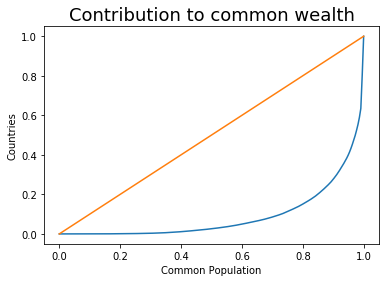

In [27]:
def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(gini(arr))

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.xlabel("Common Population")
plt.ylabel("Countries")
plt.title("Contribution to common wealth",size = 18)
plt.savefig("populatipon-lorenz.png",dpi = 200,format = 'png')
plt.show()

plt.close()